In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [52]:
file = "Data Output/Monthly_GDP_Growth_2014_2019.csv"
GDP = pd.read_csv(file)
GDP

,year,month,GDP_%_change
0,2014,January,0.5
1,2014,February,0.2
2,2014,March,0.1
3,2014,April,0.1
4,2014,May,0.4
...,...,...,...
67,2019,August,0.1
68,2019,September,0.1
69,2019,October,-0.1
70,2019,November,0.1


In [49]:
file1 = "Data Output/Toronto_Crimes_Occurred_2014_2019.csv"
Crimes = pd.read_csv(file1)
Crimes

,Unnamed: 0,event_unique_id,premisetype,ucr_code,ucr_ext,offence,reportedyear,reportedmonth,reportedday,reporteddayofyear,...,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Long,Lat
0,0,GO-20141756319,Commercial,1430.0,100.0,Assault,2014.0,March,24.0,83.0,...,24.0,83.0,Monday,1.0,Assault,D42,132,Malvern (132),-79.199081,43.800281
1,1,GO-20143006885,Other,2120.0,200.0,B&E,2014.0,September,29.0,272.0,...,27.0,270.0,Saturday,16.0,Break and Enter,D52,76,Bay Street Corridor (76),-79.386383,43.662472
2,2,GO-20141756802,Commercial,2120.0,200.0,B&E,2014.0,March,24.0,83.0,...,24.0,83.0,Monday,6.0,Break and Enter,D23,1,West Humber-Clairville (1),-79.612595,43.720406
3,3,GO-20141760570,Apartment,2120.0,200.0,B&E,2014.0,March,24.0,83.0,...,24.0,83.0,Monday,15.0,Break and Enter,D33,47,Don Valley Village (47),-79.349121,43.782772
4,4,GO-20142004859,Commercial,1610.0,210.0,Robbery - Business,2014.0,May,3.0,123.0,...,3.0,123.0,Saturday,2.0,Robbery,D11,90,Junction Area (90),-79.458778,43.664490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227331,229107,GO-20192465270,NaN,NaN,NaN,Stabbing,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,homicide,D51,73,Moss Park (73),-79.371033,43.658295
227332,229108,GO-20192490349,NaN,NaN,NaN,Shooting,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,homicide,D22,13,Etobicoke West Mall (13),-79.562935,43.639656
227333,229109,GO-20192503671,NaN,NaN,NaN,Shooting,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,homicide,D43,138,Eglinton East (138),-79.239731,43.741611
227334,229110,GO-20192520736,NaN,NaN,NaN,Shooting,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,homicide,D42,132,Malvern (132),-79.227135,43.810932


In [11]:
Crimes.columns

Index(['Unnamed: 0', 'event_unique_id', 'premisetype', 'ucr_code', 'ucr_ext',
       'offence', 'reportedyear', 'reportedmonth', 'reportedday',
       'reporteddayofyear', 'reporteddayofweek', 'reportedhour',
       'occurrenceyear', 'occurrencemonth', 'occurrenceday',
       'occurrencedayofyear', 'occurrencedayofweek', 'occurrencehour', 'MCI',
       'Division', 'Hood_ID', 'Neighbourhood', 'Long', 'Lat'],
      dtype='object')

In [27]:
year_list = [2014, 2015, 2016, 2017, 2018, 2019]
month_list = ['January', 'February','March','April','May','June','July','August','September','October','November','December']

In [51]:
year_month_crimes=[]
for year in year_list:
    for month in month_list:
        df=Crimes.loc[(Crimes['occurrencemonth']==month)&(Crimes['occurrenceyear']==year),:]
        year_month_crimes.append(len(df['MCI']))

correlation is -0.0353
the linear regression formula is y = -57.13x + 3159.55


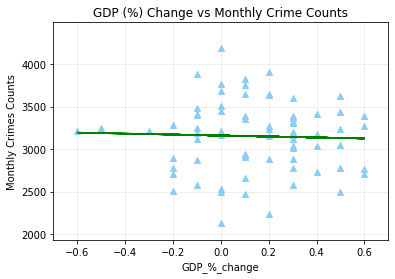

In [53]:
x_axis = GDP['GDP_%_change']
y_axis = year_month_crimes
plt.scatter(x_axis, y_axis, marker='^', color='lightskyblue')
plt.xlabel('GDP_%_change')
plt.ylabel('Monthly Crimes Counts')
plt.title('GDP (%) Change vs Monthly Crime Counts')
plt.xlim(min(x_axis)-0.1,max(x_axis)+0.1)
plt.ylim(min(y_axis)-200,max(y_axis)+300)
plt.grid(alpha=0.25)
correlation=st.pearsonr(x_axis, y_axis)
print(f"correlation is {round(correlation[0],4)}")
slope,intercept,rvalue,pvalue,stderr=st.linregress(x_axis,y_axis)
print(f'the linear regression formula is y = {round(slope,2)}x + {round(intercept,2)}')
linear_regression = slope*x_axis+intercept
plt.plot(x_axis, linear_regression, color='green')
plt.show()